# Lesson 9: Supervised Machine Learning
*Use a set of training data to make predictions about new data.*

## Instructions
This tutorial provides step-by-step training divided into numbered sections. The sections often contain embeded exectable code for demonstration.  This tutorial is accompanied by a practice notebook: [L09-Supervised_Machine_Learning-Practice.ipynb](./L09-Supervised_Machine_Learning-Practice.ipynb). 

Throughout this tutorial sections labeled as "Tasks" are interspersed and indicated with the icon: ![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/16/Apps-gnome-info-icon.png). You should follow the instructions provided in these sections by performing them in the practice notebook.  When the tutorial is completed you can turn in the final practice notebook. 

## Introduction

For this notebook we will learn about supervised machine learning using the **scikit-learn** (**sklearn**) package. skLearn is a Python library that provides machine clearning capabilities.  It is built on Numpy, SciPy and matplotlib.

For machine learning there are three primary purposes:
- Classification: to predict the outcome "class" to which a sample belongs.
- Regression: predicting an outcome value on a continuous scale.
- Clustering: automatic grouping of similar objects into outcome classes when those classes are unknown.

You can read more at these links:

- Classification: https://en.wikipedia.org/wiki/Statistical_classification
- Prediction: https://en.wikipedia.org/wiki/Predictive_analytics
- Clustering: https://en.wikipedia.org/wiki/Cluster_analysis

For supervised machine learning, a training set of data is provided to a set of appropriate algorithms (i.e. for classification, regression or clustering). The training data set typically consists of a subset of all available data that includes both independent and dependent variables (i.e. **outcome**) measured across a variety of samples. This training data is provided to one or more algorithms which determine a **model** that can be used to classify or predict outcomes.  Typically, a set of data is set aside to test, or validate, the accuracy of the model.  

For this notebook we will once again use the Iris dataset and we will use supervised machine learning to create a model for predicting species. Therefore, the outcome variable is `species` and all others (`sepal_width`, `sepal_length`, `petal_width`, `petal_length`) are the independent variables.  Therefore, this notebook will demonstrate a "Classification" example.

---
## 1. Getting Started
As before, we import any needed packages at the top of our notebook. Let's import Numpy, Pandas, Seaborn, matplotlib and the sklearn machine learning libraries.

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Task 1a: Setup

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Import the following package sets:
+ packages for data management
+ pacakges for visualization
+ packages for machine learning

Remember to activate the `%matplotlib inline` magic.

---
## 2. Data Exploration  

Import the iris dataset

In [2]:
iris = sns.load_dataset('iris')

### 2.1 Summarize the dataset
Just as we learned in the Data Wrangling notebook, we should always summarize the data. Execute the following commands to explore this data.

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


How many samples do we have for our outcome variable?

In [7]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

### 2.2 Check for missing or duplicated data
Just like we did in the Data Wrangling notebook, we want to check for missing values and duplication

In [8]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
iris.duplicated().sum()

1

In [10]:
iris[iris.duplicated(keep= False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

### 2.3 Examine data distributions and check for outliers
Some statistical methods make assumptions about the distribution of samples for each variable and the presence of outliers, so, we need to be aware of how our data appears and any potential outliers. Pandas dataframes have a very convenient `hist` function for printing histograms of all numeric columns. It is based on Matplotlib.

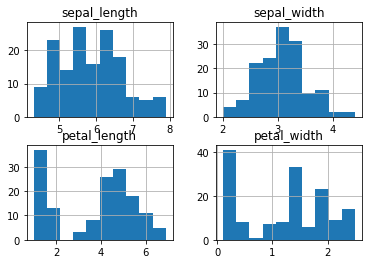

In [12]:
iris.hist()
plt.show()

Conveniently, Pandas dataframes also have a flexible `plot` function as well, that allows us to print other types of pltos, such as a boxplot. You can learn more about the plot function by viewing the [online documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

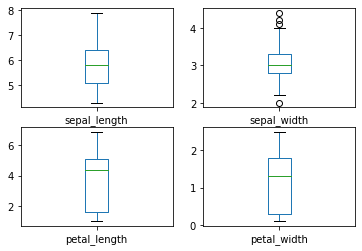

In [13]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Let's see if there are outliers without our outcome groups. It turns out we can easily do this with a `grouby`.  The DataFrameGroupBy object, also has a `boxplot` function that makes this easy to view as well!

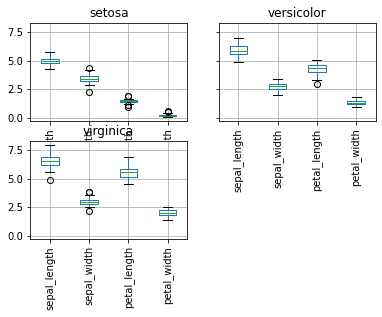

In [14]:
iris.groupby(by='species').boxplot(rot=90);

It does indeed appear that we have outliers.

### 2.4 Search for Collinearity
It is important to identify collinearity prior to creating any machine learning model.  There are two types of collinearity:
- Structurual: this occurs when we create new columns in our data that are derived from other columns. For example, a log transformation of one column.
- Multicollinearity:  this can be natural in our data and occurs when one variable can be used to linearly predict another.  

Why can collinearity be bad?  For regression models, collinearity can weaken the p-values because it makes the estimated co-efficients too sensitive to changes in the model.  For an example of the affect that collinarity can have with a regression model sse the [JMP Multicollinearity](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/multicollinearity.html) page.

We can empirically check for collinarity using a simple pairwise scatterplot using Seaborn.

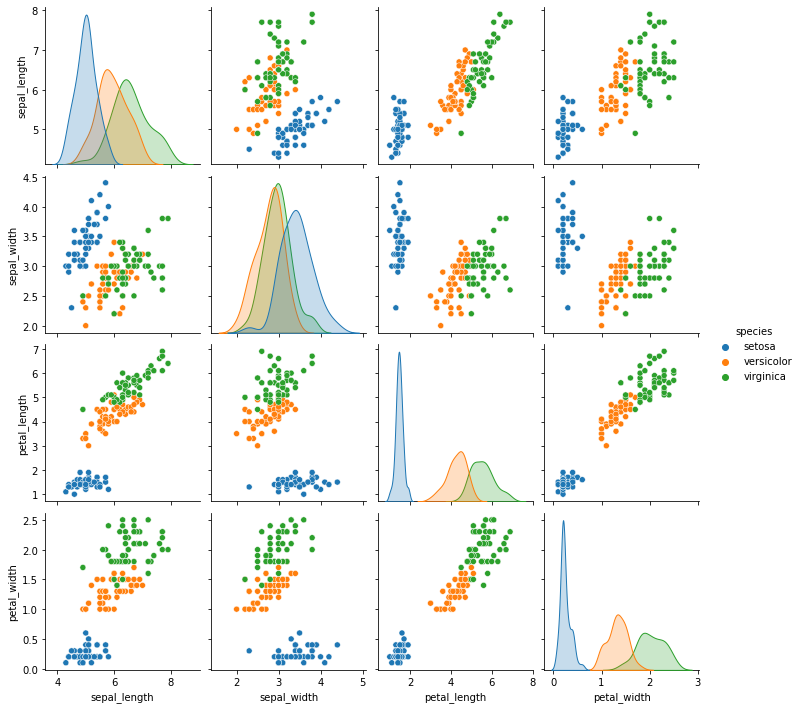

In [15]:
sns.pairplot(iris, hue="species")

You should consider removing columns that are severly collinear. The more collinear, the more significant the impact on the model. 

#### Task 2a: Data Exploration

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 do you see any problems with this iris dataset? If so, please describe them in the practice notebook.  If not, simply indicate that there are no issues.

#### Task 2b:  Make Assumptions
<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 are there any columns that would make poor predictors of species? 

**Hint**: columns that are poor predictors are:
+ those with too many missing values
+ those with no difference in variation when grouped by the outcome class
+ variables with high levels of collinearity

## 3. Prepare the Data

### 3.1 Prepare the Data
The sklearn package expects that all indpendent variables are numerical and that independent and dependent variables are separated into different data objects. It also expects that data is in Numpy arrays (not Pandas data frames). First, let's separate the variables to only include those that are numeric. Then, we'll create a 2D Numpy array, named `X`, containing the indpendent variables.

In [16]:
X = iris.loc[:,'sepal_length':'petal_width'].values

# Show the contents of X by displaying the first 10 rows.
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Next we will create a new Numpy 1D array named `Y` that will house the dependent variable (species name).

In [17]:
Y = iris['species'].values

# Show the contents of X by displaying the first 10 elements.
Y[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

Observe that we have no independent variables that are categorical. All are numeric. If we did have categorical data we must convert those to numeric values. sklearn requires that all data in `X` be numeric.  We have several options as defined in the [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)  section of sklearn:
1. Use the sklearn `processing.OrdinalEncoder` function 
   - It converts categorical data to ordered numbers. 
   - Use this only if the classes are also ordinal.
2. Use the `processing.OneHotEncoder` function. 
   - It converts all but one class for a single variable to 0 and leaves one category of interest as 1.  
   - Use this only if you are predicting only a single class of outcome.  
3. Pivot the categorical column into multiple new binary columns. 
   - The values in the columns are 0 and 1 and indicate if the category applies to the sample row.  
   - Use this if there are multiple classes for a single variable and they are not ordinal.  Unfortunately, this is **not** tidy. But it is required to handle multiple classes.

As the iris data is all numeric we have no need for any of these options.

### 3.2 Normalize the data
Many machine learning algorithms expect that the quantitative columns are centered at 0 and scaled to unit variance.  See the [preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) for sklearn.

According to the sklearn documentation:

> In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation... The function `scale` provides a quick and easy way to perform this operation on a single array-like dataset.

> If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use `robust_scale`... [it uses] more robust estimates for the center and range of your data.


We can, therefore, normalize the `X` Numpy array using the [preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale) or [preprocessing.robust_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.robust_scale.html#sklearn.preprocessing.robust_scale) function of Sklearn. Choose the method most appropriate given the state of outliers in the data. As it is clear we have outliers in some of the columns of the iris data we should use the`robust_scale` method.

In [18]:
X = preprocessing.robust_scale(X)

# Show the contents of X by displaying the first 10 rows.
# The values should be scaled between -1 to 1
X[0:10]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ]])

### 3.3  Split the data for testing and validation
For supervised machine learning, you must provide a testing dataset to create a model.  The model is then used on another dataset to validate its accuracy.  If the dataset is large enough we split the original dataset into a test and a validation set.  We can do this using the sklearn `model_selection.train_test_split` function.  The function takes as input the 2D Numpy array of independent variables and the 1D Numpy array with the oucome variable.  It also takes the following arguments:

- `test_size`: "should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split." For example, to use 80% of the data for model construction and 20% for testing (i.e. validation) this argument should be set to 0.2.  The default is 0.25.
- `random_state`: rows are randomly selected to include in the split. You can ensure the same random order by providing a seed.  This allows for reproducibility.

Lets split the data with 20% used for testing and a random seed of 10:

In [19]:
# Split-out validation dataset
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=10)

# Print the shapes of each dataset
print("The sizes of the training independent and dependent datasets")
print(Xt.size)
print(Yt.size)
print("The sizes of the validation independent and dependent datasets")
print(Xv.size)
print(Yv.size)

The sizes of the training independent and dependent datasets
480
120
The sizes of the validation independent and dependent datasets
120
30


Using the code above `Xt` and `Yt` become the "training" data.  and `Xv` and `Yv` become the "testing" data used for validation.

## 3. Perform Supervised Machine Learning


### 3.1 K-Fold Strategy

Now that we have our data separated into training and validation sets, we should establish a training strategy.  To avoid overfitting a model to the data, we should perform a K-fold cross-validation strategy.  This type of strategy will further divide our training data into <i>k</i> subsets. The model will be trained <i>k</i> times using <i>k</i>-1 subsets. The <i>k</i>th subset will be set aside for validation. But, for each of the <i>k</i> tests, a different subset will have its turn for validation.  An accuracy score is provided for each attempt.  You can evaulate the performance of a machine learning algorithm by exploring the distribution (mean and variance) of the <i>k</i> attempts (we will try this later in the notebook).

![KFCV](https://cdn-images-1.medium.com/max/1080/1*qPMFLEbvc8QQf38Cf77wQg.png)

<sup>Image from [TowardsDataScience.com Cross Validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) page.

To establish a K-fold cross-validation strategy we use the `model_selection.KFold` function of sklearn.  It takes two important arguments:

- `n_splits`: the number of subsets to split the data.
- `random_state`: you can ensure the same random order in the subsets by providing a seed.  This allows for reproducibility.

Lets create a K-fold strategy that splits the iris data into 10 subsets and a random seed of 10.

In [20]:
kfold = model_selection.KFold(n_splits=10, random_state=10)

C:\Users\shres\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### 3.2. Evaulate ML Algorithms

sklearn provides a variety of supervised machine learning aglorithms. Here, we will evaluate six of them:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

Each of these algorithms is provided by sklearn as an object. Notice, these were imported in Section 1 above: 

```python
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
```

To build a model, we must first create an object for the algorithm.  For example, to create an object for Logistic Regression we could use the following code:
```python
alg = LogisticRegression(solver='lbfgs', multi_class="auto")
```


In the following sections, we will construct an object for each algorithm and use it to create a predictive model, but first, we need a way to store the results of all ML algorithms that we'll be using. To make this easy, we will store results from each method in a dictionary. The following code prepares a dictionary containing, as keys, the names of the 6 methods we will explore.  The value is an array of 10 zeros.  This is because we will be performing a 10-fold cross-validation and we replace the zeros with results of each of the 10 attempts per method. 

In [21]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
results

{'LogisticRegression': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'LinearDiscriminantAnalysis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'KNeighborsClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'DecisionTreeClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GaussianNB': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SVC': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

After creating the algorithm object (in this example a LogisiticRegression object) we perform the model building and cross-validation in one step using the `model_selection.cross_val_score` funtion:

```python
model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, scoring="accuracy", error_score=np.nan)
```
Here we provide the algorithm object, the training data, validation data, k-fold object, the `scoring` accuracy argument and an `error_score` argument.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) for details about other arguments.  We can use the same `cross_val_score` function for any of the 6 algorithms.

In the following sections, six supervised machine learning methods will be briefly introduced.  For brevity we will not explore these approaches too deeply. A brief summary is provided followed by links for additional details.

#### 3.2.1 Logistic Regression

**Brief Summary** 

In statistics, the logistic model (or logit model) uses a logistic function to model a binary outcome (i.e. values of 0 and 1) and a set of one or more independent variables: [X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub>, ... X<sub>n</sub>]:

\begin{equation*}
logit(p) = b_0 + b_1X_1 + b_2X_2 + b_2X_2 ... b_nX_n
\end{equation*}

Its goal is to determine the set of coefficients, [b<sub>1</sub>, b<sub>2</sub>, b<sub>3</sub>, ... b<sub>n</sub>], that best fit the relationship between the dependent and independent variables.   Alternatively, it is the natural log of the odds ratio:

\begin{equation*}
odds\ ratio = \frac{p}{1-p} = \frac{probability\ of\ presence}{probability\ of\ absense}
\end{equation*}

\begin{equation*}
logit(p) = ln(\frac{p}{1-p})
\end{equation*}


The following image from Wikipedia shows an example where the dependent variable of *"passing an exam"* with a single independent variable of *"hours studied"*. 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg" style="height:300px">

Samples can be classified as predicting a passing score or a non-passing score by where they fall (above or below) on the line.  As a machine learning approach, we can provide a set of training data to create the model, then use future data to predict an outcome.

**When to use:**
+ Input data is quantitative.
+ No colliniearity.
+ No outliers.
+ Relationship is expected to be linear

**Additional Resources**
+ [skLearn Logisitic Regression Function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
+ [Wikipedia LR](https://en.wikipedia.org/wiki/Logistic_regression)
+ [TowardsDataScience.com LR](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

**Practice**

To perform Logisitc Regression with sklearn, we must first create a LogisiticRegression object. There are two important arguments to provide:

- `solver`: There are several different solvers: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’.  These are meant for different types of data:
   + For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
   + For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
   + ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.
- `multi_class`: set this argument when there are more than two classes in the outcome variable. Setting it to `auto` allows the algorithm to select the best approach for working with the data.  

Because the iris species is multinomial (multiple categories), we will set the `multi_class` argument to `auto` and the `solver` to `libfgs`

In [22]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([1.        , 0.66666667, 0.91666667, 0.83333333, 1.        ,
       0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ])

#### 3.2.2 Linear Discriminant Analysis (LDA)

**Brief Summary** 

Linear Discriminant Analysis (LDA) is a classification method that employs a dimensionality reduction technique.  

From the [Wikipedia LDA](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) page:

> Linear discriminant analysis (LDA),... [is] a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events... LDA is closely related to analysis of variance (ANOVA) and regression analysis, which also attempt to express one dependent variable as a linear combination of other features or measurements. However, ANOVA uses categorical independent variables and a continuous dependent variable, whereas discriminant analysis has continuous independent variables and a categorical dependent variable (i.e. the class label)

Assumptions:
+ Outcome classes are normally distributed.
+ Variance between outcome classes is equal.

LDA is similar to Principal Component Analysis (PCA), but….
+ PCA is unsupervised, LDA is supervised
+ PCA tries to maximize the variance.
+ LDA tries to maximize the separation between data classes.

<img src="http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png" style="height:250px">
<sup><i>Image from <a href="http://sebastianraschka.com/Articles/2014_python_lda.html">SebastianRaschka Liniear Discriminant Analysis</a> page</i></sup>

**When to use:**
+ The dependent variable is categorical (qualitative) with "classes" or categories as outcomes 
+ The independnet variables are quantitative.

**Additional Resources**
+ [skLearn LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
+ [Wikipedia LDA](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
+ [TowardsDataSciecne LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)

**Practice**

Similar to Logistic Regression, we must first create a LinearDiscriminantAnalysis object, then call `cross_val_score`.  Here we'll just use the default settings.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) for a more thorough description of arguments and flexibility of the algorithm.

In [23]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Execute the cross-validation strategy
results['LinearDiscriminantAnalysis'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                        scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LinearDiscriminantAnalysis']

array([1.        , 0.91666667, 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

#### 3.2.3 K-Nearest Neighbors (KNN)

**Brief Summary**

From the [Wikipedia KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) page:

> In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression... 
>
> <img src="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" style="height: 200px">
>
> [Above is an] example of k-NN classification. The test sample (green circle) should be classified either to the first class of blue squares or to the second class of red triangles. If k = 3 (solid line circle) it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the first class (3 squares vs. 2 triangles inside the outer circle).

For the KNN approach to be useful, the outcome classes must be distinguishable. As an exapmle of distinguishable classes, consider the Iris dataset petal width vs petal length:

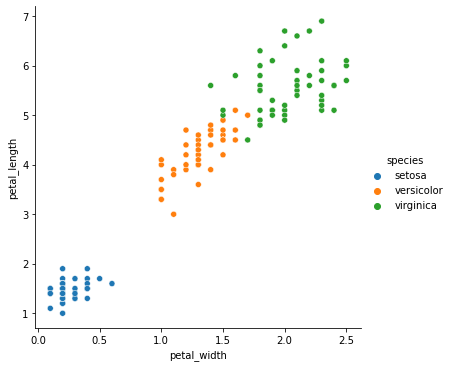

In [24]:
sns.relplot(x="petal_width", y="petal_length", hue="species", data=iris);

**When to Use**
+ Multiple outcomes (not just binary)
+ There are no assumptions for the outcome distribution
+ The outcomes classes are already distinguishable in the problem space.

**Additional Resources**
+ [skLearn KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
+ [Wikipedia KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
+ [TowardsDataScience.com KNN](https://towardsdatascience.com/knn-k-nearest-neighbors-1-a4707b24bd1d)

**Practice**

Similar to other algorithms, we must first create a KNeighborsClassifier object, then call `cross_val_score`.  Here we'll just use the default settings.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for a more thorough description of arguments and flexibility of the algorithm.

In [25]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()

# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       1.        , 1.        , 0.91666667, 1.        , 1.        ])

#### 3.2.4  Classification and Regression Trees (Decision Trees)

**Brief Summary** 

From the [Wikipedia Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning) page:

> In computer science, Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modeling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.
>
>![Decsion Trees](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)
>
> [The above] tree [shows] survival of passengers on the Titanic. The figures under the leaves show the probability of survival and the percentage of observations in the leaf.

In short, trees are learned by splitting the source data based on an attribute value and two types of trees are possible based on the outcome data:

Classification Trees
- When outcome is categorical

Regression Trees
- When outcome is continuous

**When to Use**
- For both numerical and categorical outcome data
- Distribution of outcome is unknown or doesn’t meet other model assumptions.
- Multiple outcomes.

**Additional Resources**
- [sklearn Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [sklearn CART](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Wikipediea Decision Trees](https://en.wikipedia.org/wiki/Decision_tree)
- [TowardsDataScience.com CART](https://towardsdatascience.com/decision-trees-d07e0f420175)


**Practice**

Similar to other algorithms, we must first create a DecisionTreeClassifier object, then call `cross_val_score`.  Here we'll just use the default settings.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for a more thorough description of arguments and flexibility of the algorithm.

In [26]:
# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()

# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.91666667, 0.83333333, 0.91666667, 0.91666667, 1.        ,
       1.        , 1.        , 0.83333333, 0.91666667, 1.        ])

#### 3.2.5 Gaussian Naive Bayes (NB)

**Brief Summary**

From the [Wikipedia Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) page:

> In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Naive Bayes methods rely on Bayes theorem, and follows axioms of the conditional probability:

\begin{equation*}
P(A | B) = \frac{P(B|A)P(A)}{P(B)}
\end{equation*}

.
Where:
 - A = outcome class
 - B = input data vector for a sample.
 
There are many NB algorithms and they differ in assumptions about the distribution of P(A|B). For the Guassian approach the distributions are expected to be Guassian and the input data is quantitative.

**When to Use**

- High independence between input data (no multicollinearity)
- Multiple outcome classes.
- Independent variables are quantitative.

**Additional Resources**
- [skLearn Guassian NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [Wikipedia NB](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [TowardsDataScience NB](https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf)

**Practice**

Similar to other algorithms, we must first create a GaussianNB object, then call `cross_val_score`.  Here we'll just use the default settings.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) for a more thorough description of arguments and flexibility of the algorithm.

In [27]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()

# Execute the cross-validation strategy
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ])

#### 3.2.6 Support Vector Machines (SVM)
**Brief Summary**

A support vector machine attempts to find an optimal separation between outcomes by separating them in multi-dimensional space (&reals;<sup>n</sup>). Consider the following figure:

<img src="https://cdn-images-1.medium.com/max/1000/1*ZpkLQf2FNfzfH4HXeMw4MQ.png" style="height:250px">
<sup><i>Image from <a href="https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47">TowardsDataScience.com SVM</a> page</i></sup>

Here the line in the first 2-dimensional plot separates the two classes and in the 3-dimensional plot, the plane separates them.  For larger dimensions, SVMs find the optimal **hyperplane**.  The optimal "hyperplane" (line or plane) is selected as the one which maximizes the **margin** between the outcome classes.  Consier the following figure:

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg" style="height:250px">
<sup><i>Image from <a href="https://en.wikipedia.org/wiki/Support-vector_machine">Wikipedia SVM</a> page</i></sup>

In the example figure above:
- The H1 line does not separate the classes. 
- The H2 line does, but only with a small margin (distance between samples in the classes) 
- The H3 line separates them with the maximal margin.

There are multiple types of SVMs.  The SVM that performs classification is known as a Support Vector Classification (SVC) algorithm.

**When to use**
- Multiple outcome classes.
- Distribution of outcome is unknown or doesn’t meet other model assumptions.
- High dimensional data
- There are more samples than features (otherwise overfitting may occur)

**Additional Resources**
- [skLearn SVM](https://scikit-learn.org/stable/modules/svm.html)
- [skLearn SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [Wikipedia SVM](https://en.wikipedia.org/wiki/Support-vector_machine)
- [TowardsDataScience.com SVM](https://towardsdatascience.com/support-vector-machines-a-brief-overview-37e018ae310f)


**Practice**

Similar to other algorithms, we must first create a SVC object, then call `cross_val_score`.  Here we'll just use the default settings.  See the [online documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) for a more thorough description of arguments and flexibility of the algorithm.

In [28]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       0.83333333, 1.        , 0.91666667, 0.91666667, 1.        ])

### 3.3 Compare Scores
Now that we have performed training and validation of six different methods we can compare the results to see which performed best.  We can do so by converting the results dictionary into a dataframe and using the `plot` function that comes with Panda's data frames to create a box plot of each test.

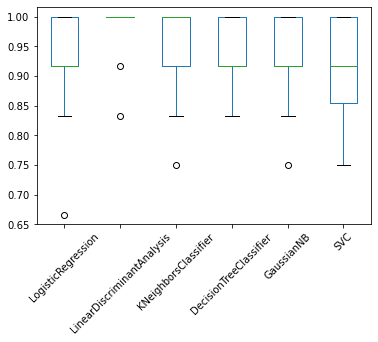

In [29]:
pd.DataFrame(results).plot(kind="box", rot=45);

### 3.4 Test the model (make predictions)

From the boxplot in the previous section, it seems as if Linear Discriminant Analysis performed best!  We will use this algorithm and the trained model to compare predictions made from the 20% of data we set aside for testing match the actual outcomes.  To do this we will use two new functions that are members of any of the algorithm objects:

- `fit`: This function employs the algorithm to create the final predictive model. All the training data is provided to this function. 
- `predict`:  This function uses the trained model to make predictions using the testing data.

In [30]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype='<U10')

Finally, we can evaulate how accurate the model has been by comparing the predictions with the actual species for the test data.  The `accuracy_score` function provides this:

In [31]:
accuracy_score(Yv, predictions)

1.0

One way to explore the performance of the algorithm is by way of a **Confusion Matrix** or error matrix.  A confusion matrix is an <i>n</i> x <i>n</i> matrix where n is the number of outcome classes. In the case of the Iris data, <i>i</i> = 3.  To view the confusion matrix use the sklearn `confusion_matrix` function.  We pass in the testing outcome set, the predictions and the order that we want the classes to appear (using the `labels` argument):

In [32]:
labels = ['versicolor', 'virginica', 'setosa']
cm = confusion_matrix(Yv, predictions, labels=labels)
print(cm)

[[13  0  0]
 [ 0  7  0]
 [ 0  0 10]]


The elements of the confusion matrix have the following meaning:
- rows of the confusion matrix represent the predicted classes 
- columns represent the actual classes.  
- elements on the diagnoal of the matrix represent the true positives
- errors are present when counts above zero are outside of the diagnoal.

***Note***: Because the result is a Numpy array, there are no row and column labels. However, because we provided the `labels` argument we know the order of the classes in the matrix.

We can use the Seaborn `heatmap` to visualize the matrix:

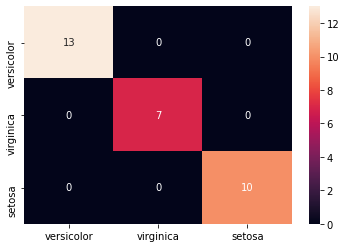

In [33]:
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

Finally, the `classification_report` function indicates how well the model was at predicting each class.

In [34]:
cr = classification_report(Yv, predictions)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Where:
- `precision`: The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- `recall`: The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- `f1-score`: The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
- `support`: the number of actual samples with the given outcome.

For comparison, let's examine a less performant model to see how the confusion matrix and reports indicate error.  Let's use the K-neighbors classifier

In [35]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = KNeighborsClassifier()

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [36]:
accuracy_score(Yv, predictions)

0.9666666666666667

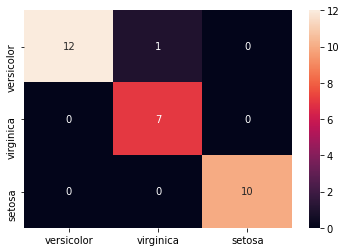

In [37]:
labels = ['versicolor', 'virginica', 'setosa']
cm = confusion_matrix(Yv, predictions, labels=labels)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

In [38]:
cr = classification_report(Yv, predictions)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Here we have one prediction that is false where `virginica` was predicted to be `versicolor`

#### Task 3a: Practice with the random forest classifier

<span style="float:right; margin-left:10px; clear:both;">![Task](http://icons.iconarchive.com/icons/sbstnblnd/plateau/96/Apps-gnome-info-icon.png)
</span>

Now that you have learned how to perform supervised machine learning using a variety of algorithms, lets practice using a new algorithm we haven't looked at yet: the Random Forest Classifier.  The random forest classifier builds multiple decision trees and merges them together.  Review the sklearn [online documentation for the RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  For this task:

1. Perform a 10-fold cross-validation strategy to see how well the random forest classifier performs with the iris data
2. Use a boxplot to show the distribution of accuracy
3. Use the `fit` and `predict` functions to see how well it performs with the testing data.
4. Plot the confusion matrix
5. Print the classification report.
